In [ ]:
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

w = [2.531996], bias = 0.4319954216480255
w = [2.519997   0.41999823], bias = 0.4199954569339752
w = [1.1579953 1.065994  1.0640382], bias = 1.0659910440444946
w = [1.600016   0.13600178 1.5080721  0.13646637], bias = 0.13599896430969238
w = [0.13999914 0.23200016 0.13977204 0.23221847 0.04092001], bias = 0.23199759423732758
w = [0.14999895 0.0020029  0.14977953 0.00542419 0.05085043 0.0075043 ], bias = 0.0019999993965029716


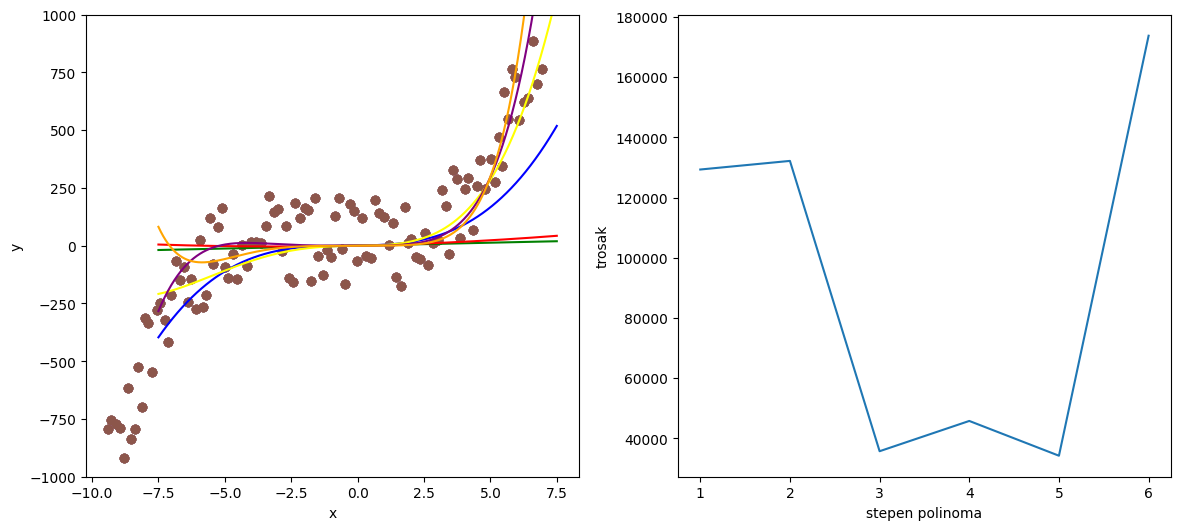

In [ ]:
def create_feature_matrix(x, nb_features):
  tmp_features = []
  for deg in range(1, nb_features+1):
    tmp_features.append(np.power(x, deg))
  return np.column_stack(tmp_features)

# Učitavanje i obrada podataka.

filename = 'funky.csv'
all_data = np.loadtxt(filename, delimiter=',', dtype='float32')

colors = ['green', 'red', 'blue', 'yellow', 'purple', 'orange']
global data
global learning_rate
global nb_epochs
global nb_samples
global w
global b
global el
global degr
global ax1
global ax2
def setup(nb_features, ax1):

    #fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

    global data
    data = dict()
    data['x'] = all_data[:, 0]
    data['y'] = all_data[:, 1]

    # Nasumično mešanje.
    global nb_samples
    nb_samples = data['x'].shape[0]
    data['x'] = create_feature_matrix(data['x'], nb_features)

    # Iscrtavanje.
    ax1.scatter(data['x'][:, 0], data['y'])
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim([-1000, 1000])

    global learning_rate
    learning_rate = 0.001
    global nb_epochs
    nb_epochs = 50

    # Model i parametri.
    global w
    w = tf.Variable(tf.zeros(nb_features))
    global b
    b = tf.Variable(0.0)

def pred(x, w, b, nb_features):
    w_col = tf.reshape(w, (nb_features, 1))
    hyp = tf.add(tf.matmul(x, w_col), b)
    return hyp

# Funkcija troška i optimizacija.
def loss(x, y, w, b,nb_features,lmbd,reg=None):
    prediction = pred(x, w, b, nb_features)

    y_col = tf.reshape(y, (-1, 1))
    mse = tf.reduce_mean(tf.square(prediction - y_col))

    # Regularizacija    
    if reg == 'l1':
        l1_reg = lmbd * tf.reduce_mean(tf.abs(w))
        loss = tf.add(mse, l1_reg)
    elif reg == 'l2':
        l2_reg = lmbd * tf.reduce_mean(tf.square(w))
        loss = tf.add(mse, l2_reg)
    else:
        loss = mse
    
    return loss

# Računanje gradijenta
def calc_grad(x, y, w, b, nb_features, lmbd):
    with tf.GradientTape() as tape:
        loss_val = loss(x, y, w, b,nb_features,lmbd,reg='l2')
    
    w_grad, b_grad = tape.gradient(loss_val, [w, b])

    return w_grad, b_grad, loss_val

# Trening korak
def train_step(x, y, w, b, nb_features, lmbd):
    w_grad, b_grad, loss = calc_grad(x, y, w, b, nb_features, lmbd)

    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    adam.apply_gradients(zip([w_grad, b_grad], [w, b]))

    return loss

def training(nb_features, lmbd, ax1, el, degr):
    # Trening.
    for epoch in range(nb_epochs):
        # Stochastic Gradient Descent.
        epoch_loss = 0
        for sample in range(nb_samples):
            x = data['x'][sample].reshape((1, nb_features))
            y = data['y'][sample]

            curr_loss = train_step(x, y, w, b, nb_features, lmbd)
            epoch_loss += curr_loss

        # U svakoj stotoj epohi ispisujemo prosečan loss.
        epoch_loss /= nb_samples
        if (epoch + 1) % 100 == 0:
            print(f'Epoch: {epoch+1}/{nb_epochs}| Avg loss: {epoch_loss:.5f}')

    # Ispisujemo i plotujemo finalnu vrednost parametara.
    print(f'w = {w.numpy()}, bias = {b.numpy()}')
    xs = create_feature_matrix(np.linspace(-7.5, 7.5, 500, dtype='float32'), nb_features)
    hyp_val = pred(xs, w, b, nb_features)
    ax1.plot(xs[:, 0].tolist(), hyp_val.numpy().tolist(), color=colors[nb_features - 1])
    el.append(epoch_loss)
    degr.append(nb_features)
    return el, degr

def run():
    lmbd = 0.01
    el = []
    degr = []
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    for features in range(1, 7):
        setup(features, ax1)
        el, degr = training(features, lmbd, ax1, el, degr)
    ax2.plot(degr, el)
    ax2.set_xlabel('stepen polinoma')
    ax2.set_ylabel('trosak')
    plt.show()
run()
#Sto je veci stepen, grafik se priblizava skupu tacaka, pritom parni stepeni se ponasaju kao parne funkcije
#I pocinju od gore, pritom gubitak se povecava svaki put na parni stepen i opada na neparni

w = [1.0819918 1.1259971 1.0818449], bias = 1.1259938478469849
w = [1.0819918 1.1259971 1.0816904], bias = 1.1259939670562744
w = [1.1579953 1.065994  1.0640382], bias = 1.0659910440444946
w = [1.1639956 1.0599923 1.0640001], bias = 1.0599908828735352
w = [1.1579951 1.0579911 1.0639899], bias = 1.0579907894134521
w = [1.1399945 0.9479889 1.027989 ], bias = 0.9819883108139038
w = [0.83399016 0.6839921  0.90198934], bias = 0.9559887051582336


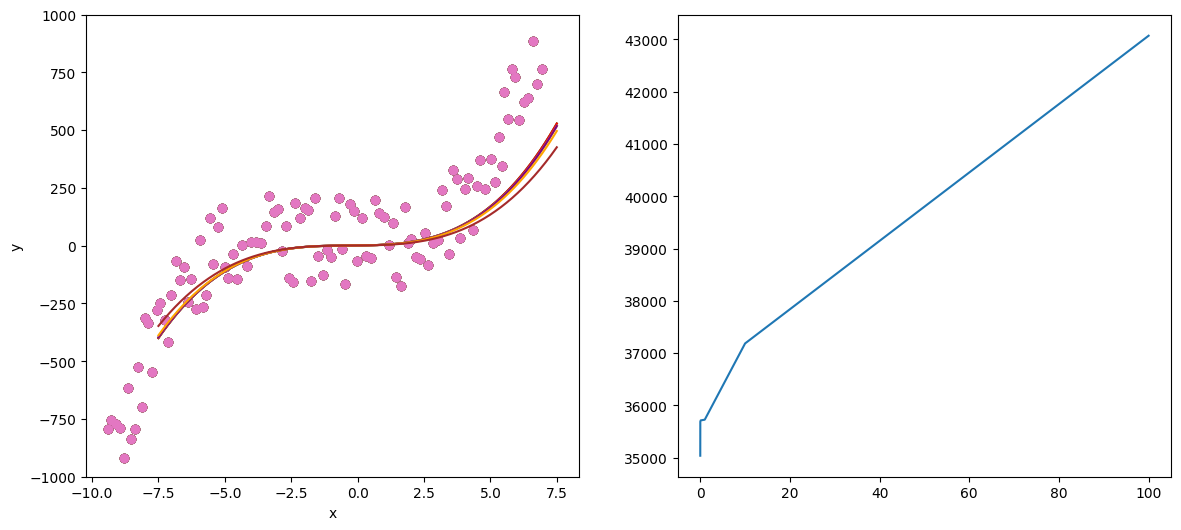

In [ ]:
def create_feature_matrix(x, nb_features):
  tmp_features = []
  for deg in range(1, nb_features+1):
    tmp_features.append(np.power(x, deg))
  return np.column_stack(tmp_features)

# Učitavanje i obrada podataka.

filename = 'funky.csv'
all_data = np.loadtxt(filename, delimiter=',', dtype='float32')

colors = ['green', 'red', 'blue', 'yellow', 'purple', 'orange', 'brown']
def setup(nb_features, ax1):

    #fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

    global data
    data = dict()
    data['x'] = all_data[:, 0]
    data['y'] = all_data[:, 1]

    # Nasumično mešanje.
    global nb_samples
    nb_samples = data['x'].shape[0]
    data['x'] = create_feature_matrix(data['x'], nb_features)

    # Iscrtavanje.
    ax1.scatter(data['x'][:, 0], data['y'])
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim([-1000, 1000])

    global learning_rate
    learning_rate = 0.001
    global nb_epochs
    nb_epochs = 50

    # Model i parametri.
    global w
    w = tf.Variable(tf.zeros(nb_features))
    global b
    b = tf.Variable(0.0)

def pred(x, w, b, nb_features):
    w_col = tf.reshape(w, (nb_features, 1))
    hyp = tf.add(tf.matmul(x, w_col), b)
    return hyp

# Funkcija troška i optimizacija.
def loss(x, y, w, b,nb_features,lmbd,reg=None):
    prediction = pred(x, w, b, nb_features)

    y_col = tf.reshape(y, (-1, 1))
    mse = tf.reduce_mean(tf.square(prediction - y_col))

    # Regularizacija    
    if reg == 'l1':
        l1_reg = lmbd * tf.reduce_mean(tf.abs(w))
        loss = tf.add(mse, l1_reg)
    elif reg == 'l2':
        l2_reg = lmbd * tf.reduce_mean(tf.square(w))
        loss = tf.add(mse, l2_reg)
    else:
        loss = mse
    
    return loss

# Računanje gradijenta
def calc_grad(x, y, w, b, nb_features, lmbd):
    with tf.GradientTape() as tape:
        loss_val = loss(x, y, w, b,nb_features,lmbd,reg='l2')
    
    w_grad, b_grad = tape.gradient(loss_val, [w, b])

    return w_grad, b_grad, loss_val

# Trening korak
def train_step(x, y, w, b, nb_features, lmbd):
    w_grad, b_grad, loss = calc_grad(x, y, w, b, nb_features, lmbd)

    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    adam.apply_gradients(zip([w_grad, b_grad], [w, b]))

    return loss

def training(nb_features, lmbd, ax1, el, degr, broj):
    # Trening.
    for epoch in range(nb_epochs):
        # Stochastic Gradient Descent.
        epoch_loss = 0
        for sample in range(nb_samples):
            x = data['x'][sample].reshape((1, nb_features))
            y = data['y'][sample]

            curr_loss = train_step(x, y, w, b, nb_features, lmbd)
            epoch_loss += curr_loss

        # U svakoj stotoj epohi ispisujemo prosečan loss.
        epoch_loss /= nb_samples
        if (epoch + 1) % 100 == 0:
            print(f'Epoch: {epoch+1}/{nb_epochs}| Avg loss: {epoch_loss:.5f}')

    # Ispisujemo i plotujemo finalnu vrednost parametara.
    print(f'w = {w.numpy()}, bias = {b.numpy()}')
    xs = create_feature_matrix(np.linspace(-7.5, 7.5, 500, dtype='float32'), nb_features)
    hyp_val = pred(xs, w, b, nb_features)
    ax1.plot(xs[:, 0].tolist(), hyp_val.numpy().tolist(), color=colors[broj - 1])
    el.append(epoch_loss)
    degr.append(nb_features)
    return el, degr

def run():
    features = 3
    lambde = [0, 0.001, 0.01, 0.1, 1, 10, 100]
    el = []
    degr = []
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    for broj in range(1, 8):
        setup(features, ax1)
        el, degr = training(features, lambde[broj - 1], ax1, el, degr, broj)
    ax2.plot(lambde, el)
    ax2.set_xlabel('lambda')
    ax2.set_ylabel('trosak')
    plt.show()
run()

#Posto je stepen zakucan na 3, grafik se ne menja dok se priblizava tackama sto je veca lambda
#Loss raste sa lambdom